In [1]:
import sys
print(sys.executable)

/home/samuel/anaconda3/envs/carnd-term1/bin/python


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [75]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)


def gausian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if (len(img.shape) > 2):
        channel_count = img.shape[2]
        ignore_mask_color = (255,)*channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1,y1), (x2, y2), color, thickness)
    

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img


def weighted_img(img, initial_img, alpha=0.8, beta=1., gamma = 0.):
    return cv2.addWeighted(initial_img, alpha, img,  beta, gamma)

In [89]:
initial_img = mpimg.imread("../test_images/solidYellowLeft.jpg")

In [90]:
img = grayscale(initial_img)
img = canny(img, 50, 150)

In [91]:
img = gausian_blur(img, 5)

In [92]:
vertices = np.array([[(0, img.shape[0]), 
                      (470, 300),
                      (490, 300),
                      (img.shape[1] + 80, img.shape[0])]])

In [93]:
masked_img = region_of_interest(img, vertices)

In [94]:
lines_img = hough_lines(masked_img, 2, np.pi / 180, 50, 10, 250)

In [95]:
final = weighted_img(lines_img, initial_img)

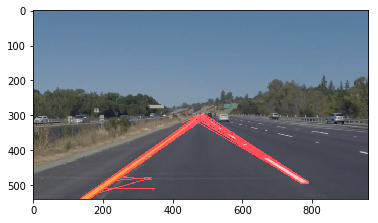

In [96]:
plt.imshow(final)